# Functional Programming 
Because functional programming (FP) is amenable to parallelization, most Big Frameworks such as Apache Spark use FP. 
As such, it is important that you understand the basics of FP.

In this tutorial, you’ll learn the following:
- What it means to say that functions are first-class citizens in Python
- How to define anonymous functions with the lambda keyword
- How to implement functional code using map(), filter(), and reduce()

# Functions as First Class Citizens
To support functional programming, it’s useful if a function in a given programming language has three abilities:

- To take another function as an argument
- To return another function as value 
- To have same properties as any other data type

Functions in Python has all of these three properties as we will see soon.

## Assigning a function to a variable
You can assign a function to a variable. You can then use that variable the same as you would use the function itself.

In [3]:
def func():
    print("I am function func()!")

# call the function
# func()

# assign the function to variable
another_name = func

# call the function using the variable
another_name()

I am function func()!


## Passing a function to another function
Here’s what’s happening in the example below:

1. The call on line 7 passes inner() as an argument to outer().
2. Within outer(), Python binds inner() to the function parameter function.
3. outer() can then call inner() directly via function.

This is known as function composition. 

When you pass a function to another function, the passed-in function sometimes is referred to as a *callback* because a call back to the inner function can modify the outer function’s behavior.

In [7]:
def inner():
    print("I am function inner()!")

def outer(function):
    function()
 
outer(inner)

I am function inner()!


In [ ]:
def square(x):
    return x^2

In [29]:
def call_square_func():
    return lambda x: x**2

In [28]:
function = call_square_func()
function(2)

4

## Returning a function as value
Just as you can pass a function to another function as an argument, a function can also specify another function as its return value

In [8]:
def outer():

def inner():
    print("I am function inner()!")
    # Function outer() returns function inner()
    return inner

function = outer()
function

function()

outer()()

I am function inner()!
I am function inner()!


Here’s what’s going on in this example:

- Lines 2 to 3: outer() defines a local function inner().
- Line 5: outer() passes inner() back as its return value.
- Line 7: The return value from outer() is assigned to variable function.

Following this, you can call inner() indirectly through function, as shown on line 10. You can also call it indirectly using the return value from outer() without intermediate assignment, as on line 12.

# Defining an Anonymous Function With lambda
Functional programming is all about calling functions and passing them around, so it naturally involves defining a lot of functions. You can always define a function in the usual way, using the def keyword as you have seen in previous tutorials in this series.

Sometimes, though, it’s convenient to be able to define an anonymous function on the fly, without having to give it a name. In Python, you can do this with a lambda expression. 

## Example of Lambda functions
This is the syntax for defining a lambda function:
```lambda <parameter_list>: <expression>```

Once defined, the value of a lambda expression is a callable function, just like a function defined with the def keyword. It takes arguments, as specified by ```<parameter_list>```, and returns a value, as indicated by ```<expression>```. 

In [9]:
# Define the function
reverse_string = lambda s: s[::-1]

# call the function
reverse_string("Dunstan")
print("This is a palindrome: {}".format(reverse_string("madam")))

This is a palindrome: madam


it’s not necessary to assign a variable to a lambda expression before calling it. You can also call the function defined by a lambda expression directly:

In [4]:
(lambda s: s[::-1])('Dunstan')

'natsnuD'

## Using Lambda as a callback function
When you sort a list, you can pass a function to define how you want the list sorted like so

In [5]:
# Define list
animals = ["ferret", "vole", "dog", "gecko"]

# Sort by length of each item
sorted(animals, key=lambda s: -len(s))

# Sort alphabetically BUT by using reversed words
sorted(animals, key=lambda s: s[::-1])

['vole', 'dog', 'gecko', 'ferret']

**EXERCISE-1**
1. Using the list above, create a dictionary where the keys are the animals and the values are given by: [500, 30, 0, 100]
2. Assuming that the values represent the number of available animals, use the ```sorted``` function and callback to return animal with the largest number

## Some notes about Lambda functions

- Note that you can only define fairly rudimentary functions with lambda. 
- The return value from a lambda expression can only be one single expression. 
- A lambda expression can’t contain statements like ```assignment``` or ```return```
- A A lambda expression can’t contain control structures such as ```for, while, def```. However, some operators such as ```and, not, or``` are allowed. ```if, else``` is also allowed.

In [6]:
is_even = lambda x: True if x % 2 == 0 else False

# Higher Order Functions in Python
We will look at three higher order functions as follows:
1. **Map:** you can apply a function to each element in an iterable in turn, and map() will return an iterator that yields the results. This can allow for some very concise code because a map() statement can often take the place of an explicit loop.
2. **Filter:**
3. **Reduce:**

## Map
We use ```map``` to apply a function to an Iterable such as a list of dictionary.

### Calling map() With a Single Iterable
The syntax is like this: ```map(<f>, <iterable>)```, ```map(<f>, <iterable>)``` returns in iterator that yields the results of applying function ```<f>``` to each element of ```<iterable>```.

In [32]:
def reverse_string(s):
    return s[::-1]

animals = ["cat", "dog", "hedgehog", "gecko"]
iterator = map(reverse_string, animals)
iterator

In [33]:
list(iterator)

['tac', 'god', 'gohegdeh', 'okceg']

**EXERCISE-2**

1. Since map doesnt return a list, how do we retrieve the list of elements from the iterator returned by map? Please re-write the example above so that you return a list.
2. We defined ```reverse_string``` using ```def``` keyword, rewrite the example above by using a lambda function defined withing the map function and return a list.

### Calling map() With Multiple Iterables
The syntax is like this: ```map(<f>, <iterable₁>, <iterable₂>, ..., <iterableₙ>)``` and ```map(<f>, <iterable1>, <iterable2>, ..., <iterablen>)``` applies ```<f>``` to the elements in each ```<iterablei>``` in parallel and returns an iterator that yields the results.

The way that ```map``` acts for multiple iterable isnt as intuitive but here is the explanation: The number of ```<iterablei>``` arguments specified to map() must match the number of arguments that ```<f>``` expects. ```<f>``` acts on the first item of each <iterablei>, and that result becomes the first item that the return iterator yields. Then ```<f>``` acts on the second item in each ```<iterablei>```, and that becomes the second yielded item, and so on.

In [22]:
def add(x, y, z):
    return x + y + z

In [23]:
results = list(map(add, [1, 2, 3], [10, 20, 30], [100, 200, 300]))

[111, 222, 333]

## The above gives us an easier way to parallelize a function or operation.

**EXERCISE-3**
1. Try calling the function like this and see what happens: list(map(add, [1, 2, 3]))

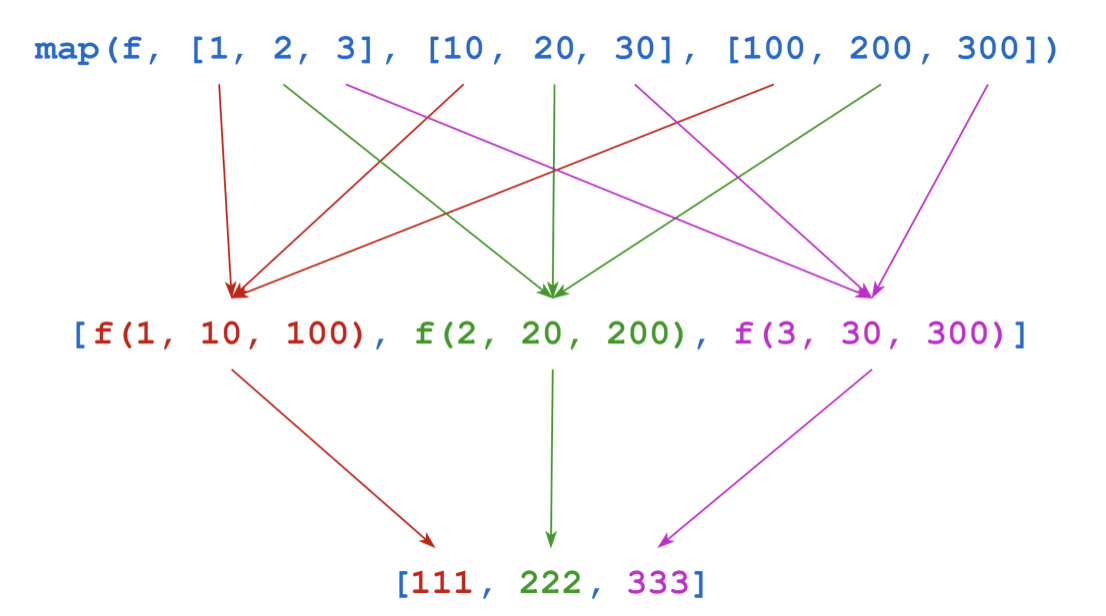

In [24]:
from IPython.display import Image
Image(filename='../docs/map.png') 

## Reduce
```reduce()``` applies a function to the items in an iterable two at a time, progressively combining them to produce a single result. To use reduce(), you need to import it from a module called functools. This is possible in several ways, but the following is the most straightforward

### Calling reduce() With Two Arguments and no initial value

In [35]:
from functools import reduce

In [36]:
def add_xy(x, y):
    return x + y

reduce(add_xy, [1, 2, 3, 4, 5])

15

This is whats happening with reduce in the function above and note that you can get the same result by using another function ```sum```. Although, in this Python implementation, ```reduce``` is not as useful and thats why it was removed from the built-in library, in Big Data processing such as the MapReduce programming model, ```reduce``` is an important function.

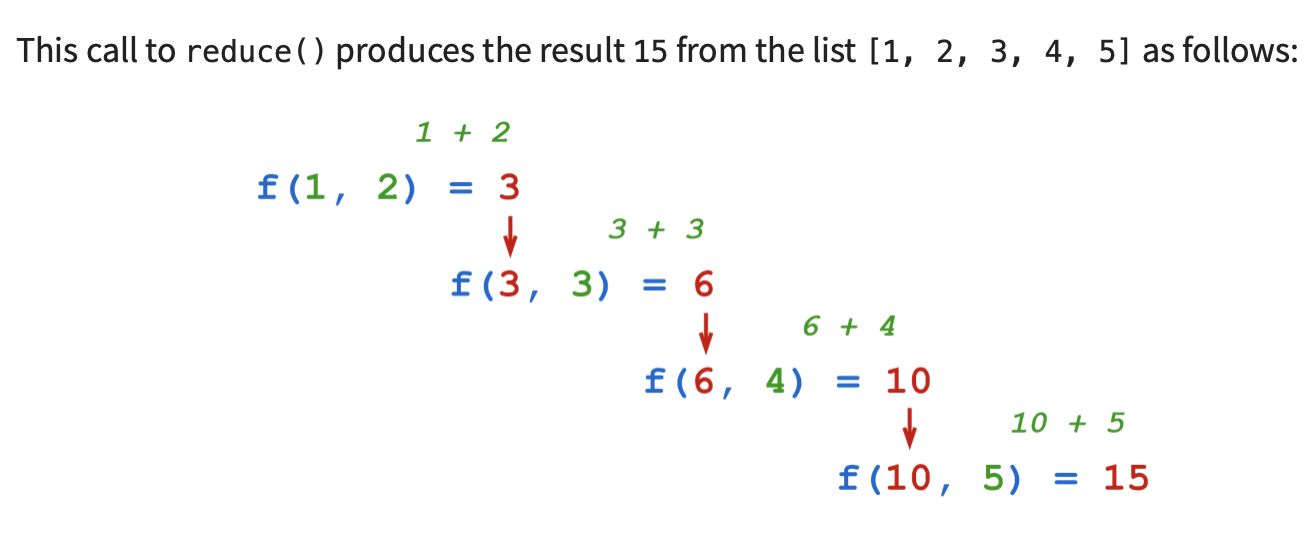

In [28]:
Image(filename='../docs/reduce.png') 

### Calling reduce() With an Initial Value
In the slides, we defined ```reduce``` by saying it contains an accumulator (or an initial value). 
In Python, you can choose to call ```reduce``` without an iniitial value as we did avove or 
with an iniitial value. 

**EXERCISE-4**

1. Use ```reduce?``` to find out more details about args into the function.
2. Next, call the reduce function on the list in the example above with an initial value of 0 and then 10

**EXERCISE-5**
1. Write an anonymous function that raises a single argument ’n’ to the nth power
2. Write a line of code that applies the function you wrote in problem 1 to an input list.
3. Write an anonymous function that takes in a single argument ’n’ and returns a function that consumes no arguments and returns n.

## More higher order functions in Python
There are many more higher order functions such as:
- Filter
- Find

# Summary
Functional programming is a programming paradigm in which the primary method of computation is evaluation of pure functions. Although Python is not primarily a functional language, it’s good to be familiar with ```lambda, map(), filter(), and reduce()``` because they can help you write concise, high-level, parallelizable code.

Although we applied functional programming concepts on trivial problems in this tutorial, the idea is that you get more familiar with this style so that once we start looking at Spark code, it doesnt look as strange to you because its similar.